In [1]:
import pandas as pd
import seaborn as sb
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
pd.set_option("display.precision", 2)

In [4]:
stat_fields = ['mp', 'fg', 'fga', 'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'ft', 'fta', 'ft_pct', 'trb', 'ast', 'stl', 'blk', 'tov', 'pts']

In [5]:
boxscores = pd.read_csv('../data/game_stats_2019.csv')

In [6]:
bsg = boxscores_grouped = boxscores.groupby(['player'])

In [7]:
team_players = ['Kyrie Irving', 'Jimmy Butler', 'D\'Angelo Russell', 'Joe Ingles', 'Jarrett Allen', 'Montrezl Harrell', 'Brook Lopez', 'Serge Ibaka', 'Malcolm Brogdon', 'Kevin Huerter', 'D.J. Augustin', 'Danny Green', 'Cody Zeller']

In [8]:
team_bsg = pd.concat([bsg.get_group(plyr) for plyr in team_players]).groupby(['player'])

In [9]:
means = [team_bsg[field].aggregate('mean') for field in stat_fields]
stds = [team_bsg[field].aggregate('std') for field in stat_fields]

/home/cliebmann/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


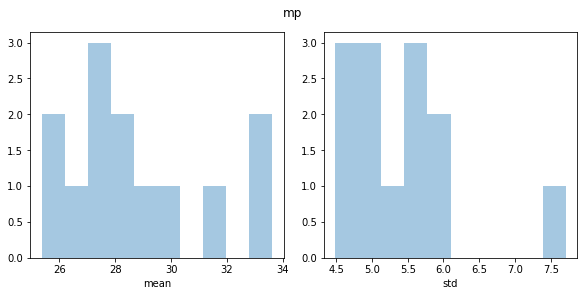

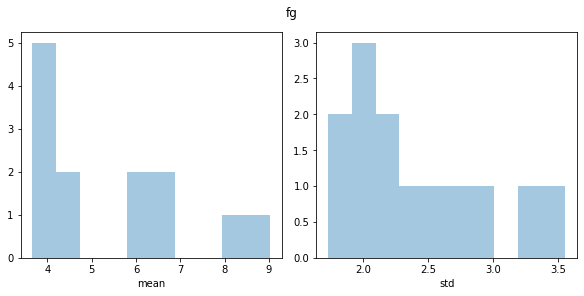

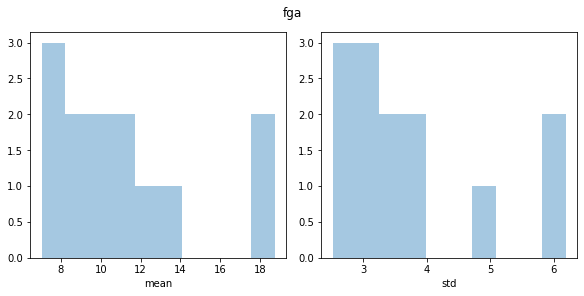

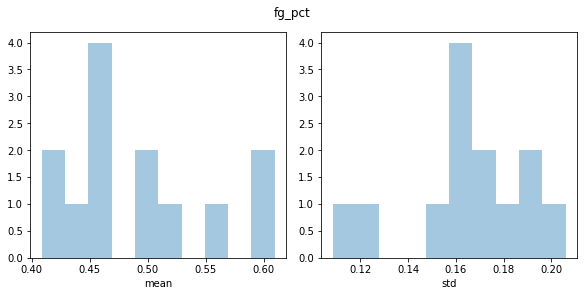

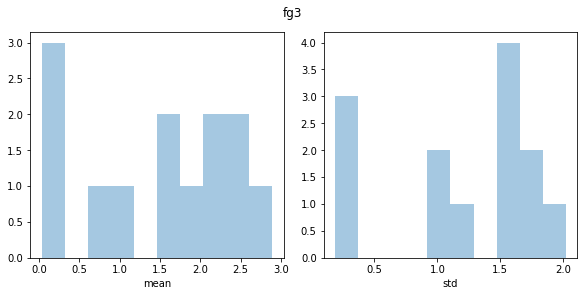

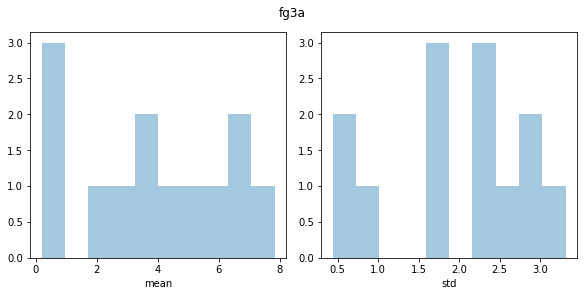

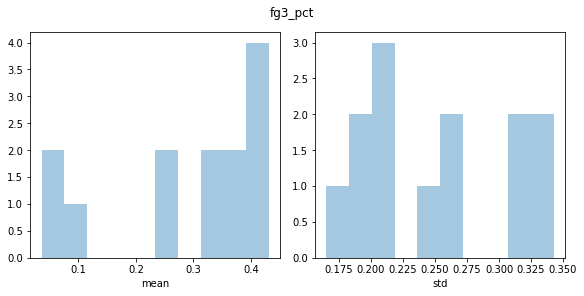

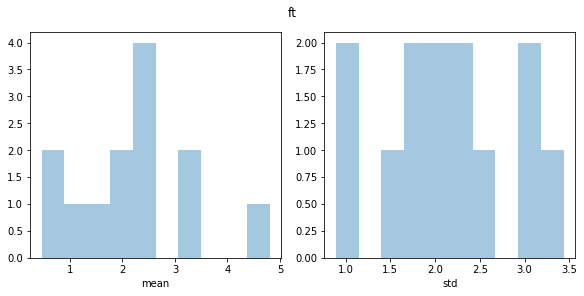

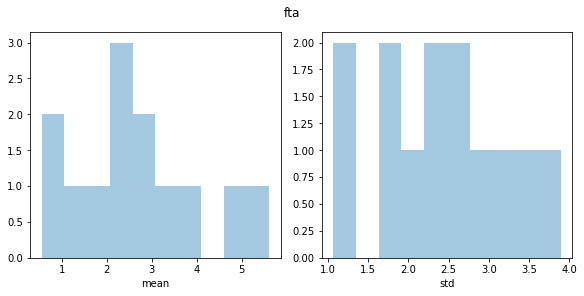

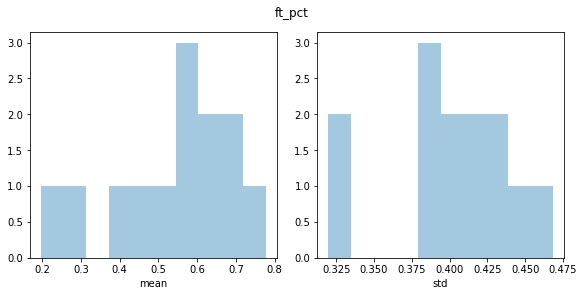

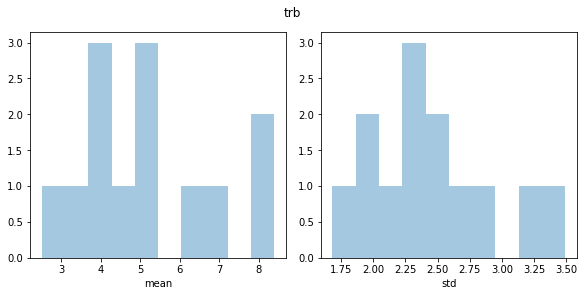

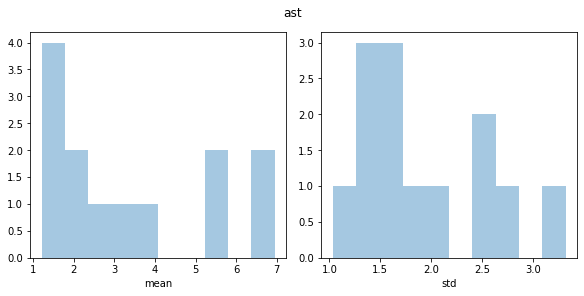

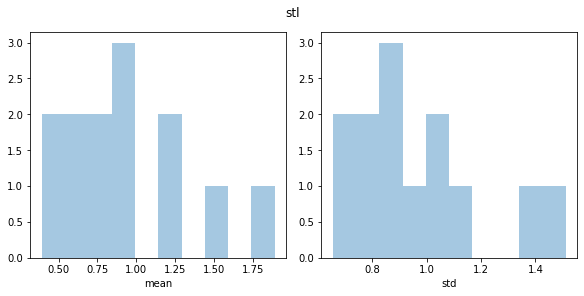

In [ ]:
for field, mean, std in zip(stat_fields, means, stds):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4), constrained_layout=True)
    fig.suptitle(field)
    sb.distplot(mean, kde=False, bins=10, axlabel='mean', ax=axs[0])
    sb.distplot(std.dropna(), kde=False, bins=10, axlabel='std', ax=axs[1])
    fig.show()